# LangGrpah 雙代理通用

## 套件引入與數值初始化

In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../src"))
from tw_textforge.agent.ai_model import AIModel
from tw_textforge.agent.general.dual_agent_graph import GeneralDualAgentGraph

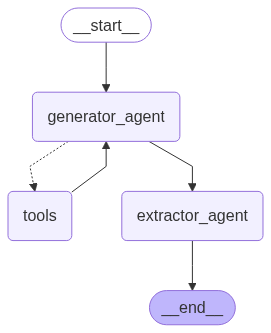

In [2]:
llm = AIModel().llm
generalgraph_obj = GeneralDualAgentGraph(generator_llm=llm, generator_llm_tools=[], extractor_llm=llm)
generalgraph_obj.show_graph()

In [3]:
from langchain_core.messages import convert_to_messages

def pretty_print_message(message, indent=False):
    pretty_message = message.pretty_repr(html=True)
    if not indent:
        print(pretty_message)
        return

    indented = "\n".join("\t" + c for c in pretty_message.split("\n"))
    print(indented)


def pretty_print_messages(update, last_message=False):
    is_subgraph = False
    if isinstance(update, tuple):
        ns, update = update
        # skip parent graph updates in the printouts
        if len(ns) == 0:
            return

        graph_id = ns[-1].split(":")[0]
        print(f"Update from subgraph {graph_id}:")
        print("\n")
        is_subgraph = True

    for node_name, node_update in update.items():
        update_label = f"Update from node {node_name}:"
        if is_subgraph:
            update_label = "\t" + update_label

        print(update_label)
        print("\n")

        messages = convert_to_messages(node_update["messages"])
        if last_message:
            messages = messages[-1:]

        for m in messages:
            pretty_print_message(m, indent=is_subgraph)
        print("\n")

In [4]:
for chunk in generalgraph_obj.graph.stream(
    {
        "messages": [
            {
                "role": "user",
                "content": "在軟體工程中，什麼是資料庫?",
            }
        ]
    },
):
    pretty_print_messages(chunk, last_message=True)

Update from node generator_agent:


================================== Ai Message ==================================

在軟體工程中，資料庫是一種有組織的資訊集合，並且以電子方式儲存在電腦系統中。資料庫通常由資料庫管理系統 (DBMS) 控制。資料庫和 DBMS 結合在一起，稱為資料庫系統。

以更實際的術語來說，資料庫就像一個電子檔案櫃。它允許使用者以結構化的方式儲存和檢索資料。資料可以組織成表格、列、欄和索引，以便更輕鬆地搜尋和篩選資料。

資料庫可以廣泛用於儲存各種類型的資訊，包括：

* 客戶資訊
* 產品目錄
* 訂單歷史記錄
* 財務記錄
* 科學資料

資料庫用作許多應用程式的後端，從簡單的網站到複雜的企業資源規劃 (ERP) 系統。它們對於有效管理和分析大量資料至關重要。

資料庫的常見範例包括：

* MySQL
* PostgreSQL
* Oracle
* Microsoft SQL Server
* MongoDB

這些系統提供各種功能，例如資料儲存、資料擷取、資料更新和資料管理。它們還包括控制對資料集存取、確保資料完整性和支援並行使用者存取的機制。

我希望這有助於了解軟體工程中的資料庫是什麼。如果您有任何其他問題，請告訴我。


Update from node extractor_agent:


================================== Ai Message ==================================

軟體工程中的資料庫：

*   **定義**：
    *   有組織的資訊集合。
    *   以電子方式儲存在電腦系統中。
    *   資料庫 + DBMS = 資料庫系統。
*   **功能**：
    *   結構化儲存和檢索資料。
    *   透過表格、列、欄、索引組織資料。
    *   有效管理和分析大量資料。
*   **用途**：
    *   儲存客戶資訊、產品目錄、訂單歷史記錄、財務記錄、科學資料等。
    *   作為應用程式後端，從網站到 ERP 系統。
*   **範例**：
    *   MySQL
    *   

In [5]:
chunk

{'extractor_agent': {'messages': [AIMessage(content='軟體工程中的資料庫：\n\n*   **定義**：\n    *   有組織的資訊集合。\n    *   以電子方式儲存在電腦系統中。\n    *   資料庫 + DBMS = 資料庫系統。\n*   **功能**：\n    *   結構化儲存和檢索資料。\n    *   透過表格、列、欄、索引組織資料。\n    *   有效管理和分析大量資料。\n*   **用途**：\n    *   儲存客戶資訊、產品目錄、訂單歷史記錄、財務記錄、科學資料等。\n    *   作為應用程式後端，從網站到 ERP 系統。\n*   **範例**：\n    *   MySQL\n    *   PostgreSQL\n    *   Oracle\n    *   Microsoft SQL Server\n    *   MongoDB\n*   **提供的功能**：\n    *   資料儲存、擷取、更新、管理。\n    *   控制資料集存取。\n    *   確保資料完整性。\n    *   支援並行使用者存取。\n\n提取完畢。', additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.0-flash', 'safety_ratings': []}, id='run--4c47e397-e886-4ed7-a12f-59b21bc63d70-0', usage_metadata={'input_tokens': 649, 'output_tokens': 239, 'total_tokens': 888, 'input_token_details': {'cache_read': 0}})]}}